<a href="https://colab.research.google.com/github/juliannadesalle/ECGR-5106-Real-Time-Machine-Learning/blob/main/Homework_0_Problem_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Define ResNetGenerator class - Given from textbook code
#@title
import torch
import torch.nn as nn

class ResNetBlock(nn.Module): # <1>

    def __init__(self, dim):
        super(ResNetBlock, self).__init__()
        self.conv_block = self.build_conv_block(dim)

    def build_conv_block(self, dim):
        conv_block = []

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim),
                       nn.ReLU(True)]

        conv_block += [nn.ReflectionPad2d(1)]

        conv_block += [nn.Conv2d(dim, dim, kernel_size=3, padding=0, bias=True),
                       nn.InstanceNorm2d(dim)]

        return nn.Sequential(*conv_block)

    def forward(self, x):
        out = x + self.conv_block(x) # <2>
        return out


class ResNetGenerator(nn.Module):

    def __init__(self, input_nc=3, output_nc=3, ngf=64, n_blocks=9): # <3> 

        assert(n_blocks >= 0)
        super(ResNetGenerator, self).__init__()

        self.input_nc = input_nc
        self.output_nc = output_nc
        self.ngf = ngf

        model = [nn.ReflectionPad2d(3),
                 nn.Conv2d(input_nc, ngf, kernel_size=7, padding=0, bias=True),
                 nn.InstanceNorm2d(ngf),
                 nn.ReLU(True)]

        n_downsampling = 2
        for i in range(n_downsampling):
            mult = 2**i
            model += [nn.Conv2d(ngf * mult, ngf * mult * 2, kernel_size=3,
                                stride=2, padding=1, bias=True),
                      nn.InstanceNorm2d(ngf * mult * 2),
                      nn.ReLU(True)]

        mult = 2**n_downsampling
        for i in range(n_blocks):
            model += [ResNetBlock(ngf * mult)]

        for i in range(n_downsampling):
            mult = 2**(n_downsampling - i)
            model += [nn.ConvTranspose2d(ngf * mult, int(ngf * mult / 2),
                                         kernel_size=3, stride=2,
                                         padding=1, output_padding=1,
                                         bias=True),
                      nn.InstanceNorm2d(int(ngf * mult / 2)),
                      nn.ReLU(True)]

        model += [nn.ReflectionPad2d(3)]
        model += [nn.Conv2d(ngf, output_nc, kernel_size=7, padding=0)]
        model += [nn.Tanh()]

        self.model = nn.Sequential(*model)

    def forward(self, input): # <3>
        return self.model(input)

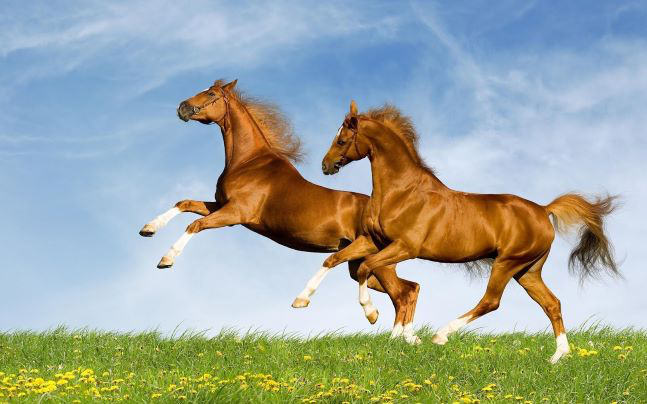

In [ ]:
#create the model 'netG' from the defined ResNetGenerator established above that has random weights
netG = ResNetGenerator()
#Get the file in which the weights fof the model have been stored
model_path = '/content/drive/MyDrive/Colab Files - Load/dlwpt-code-master/data/p1ch2/horse2zebra_0.4.0.pth'
#Load the contents of the file with the model weights 
model_data = torch.load(model_path)
#Load the weight data into the netG model
netG.load_state_dict(model_data)
#Put the netG model into eval mode so we can use it for inference
netG.eval()
#import the torchvision transforms function
from torchvision import transforms
#Transform the input image by scaling to usable size then transform the image into a tensor
preprocess = transforms.Compose([transforms.Resize(256),
                                 transforms.ToTensor()])
#Import the given image from my google drive via the path provided
from PIL import Image
img = Image.open("/content/drive/MyDrive/Colab Files - Load/Homework 0 P2/horse1.jpg")
#Print the image
img

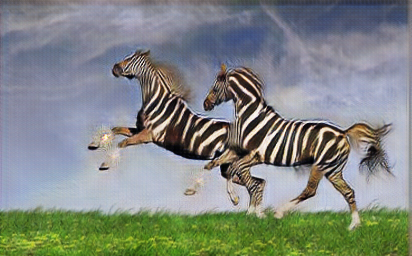

In [ ]:
#Send the image through the preprocess pipeline
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)
#Send the Batch through the model
batch_out = netG(batch_t)
#Convert the out tensor back into an image and save it to the given location in my google drive
#@title
out_t = (batch_out.data.squeeze() + 1.0) / 2.0
out_img = transforms.ToPILImage()(out_t)
out_img.save('/content/drive/MyDrive/Colab Files - Load/Homework 0 P2/zebra1.jpg')
#show me the image
out_img

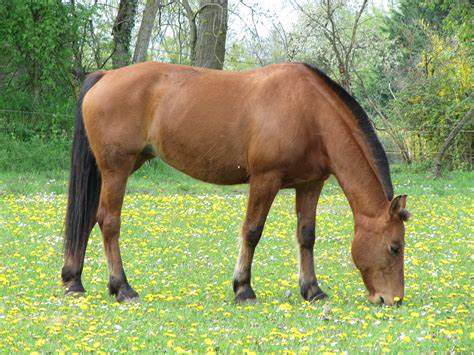

In [ ]:
#create the model 'netG' from the defined ResNetGenerator established above that has random weights
netG = ResNetGenerator()
#Get the file in which the weights fof the model have been stored
model_path = '/content/drive/MyDrive/Colab Files - Load/dlwpt-code-master/data/p1ch2/horse2zebra_0.4.0.pth'
#Load the contents of the file with the model weights 
model_data = torch.load(model_path)
#Load the weight data into the netG model
netG.load_state_dict(model_data)
#Put the netG model into eval mode so we can use it for inference
netG.eval()
#import the torchvision transforms function
from torchvision import transforms
#Transform the input image by scaling to usable size then transform the image into a tensor
preprocess = transforms.Compose([transforms.Resize(256),
                                 transforms.ToTensor()])
#Import the given image from my google drive via the path provided
from PIL import Image
img = Image.open("/content/drive/MyDrive/Colab Files - Load/Homework 0 P2/horse2.jpg")
#Print the image
img

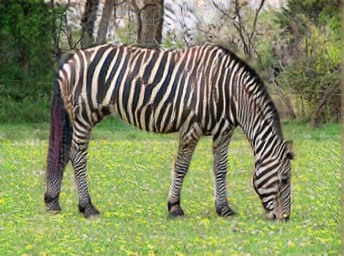

In [ ]:
#Send the image through the preprocess pipeline
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)
#Send the Batch through the model
batch_out = netG(batch_t)
#Convert the out tensor back into an image and save it to the given location in my google drive
#@title
out_t = (batch_out.data.squeeze() + 1.0) / 2.0
out_img = transforms.ToPILImage()(out_t)
out_img.save('/content/drive/MyDrive/Colab Files - Load/Homework 0 P2/zebra2.jpg')
#show me the image
out_img

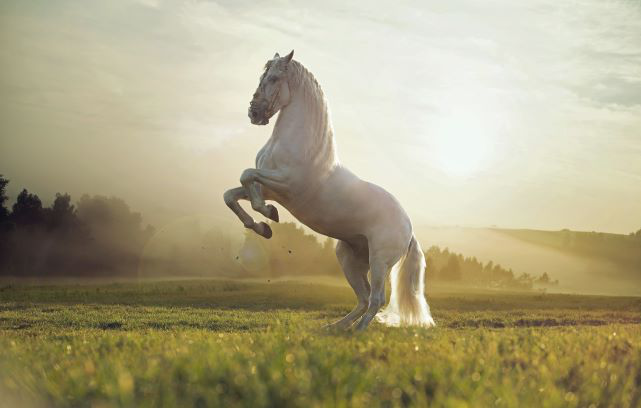

In [ ]:
#create the model 'netG' from the defined ResNetGenerator established above that has random weights
netG = ResNetGenerator()
#Get the file in which the weights fof the model have been stored
model_path = '/content/drive/MyDrive/Colab Files - Load/dlwpt-code-master/data/p1ch2/horse2zebra_0.4.0.pth'
#Load the contents of the file with the model weights 
model_data = torch.load(model_path)
#Load the weight data into the netG model
netG.load_state_dict(model_data)
#Put the netG model into eval mode so we can use it for inference
netG.eval()
#import the torchvision transforms function
from torchvision import transforms
#Transform the input image by scaling to usable size then transform the image into a tensor
preprocess = transforms.Compose([transforms.Resize(256),
                                 transforms.ToTensor()])
#Import the given image from my google drive via the path provided
from PIL import Image
img = Image.open("/content/drive/MyDrive/Colab Files - Load/Homework 0 P2/horse3.jpg")
#Print the image
img

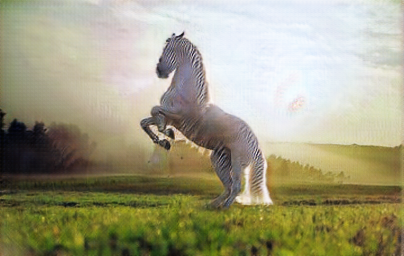

In [ ]:
#Send the image through the preprocess pipeline
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)
#Send the Batch through the model
batch_out = netG(batch_t)
#Convert the out tensor back into an image and save it to the given location in my google drive
#@title
out_t = (batch_out.data.squeeze() + 1.0) / 2.0
out_img = transforms.ToPILImage()(out_t)
out_img.save('/content/drive/MyDrive/Colab Files - Load/Homework 0 P2/zebra3.jpg')
#show me the image
out_img

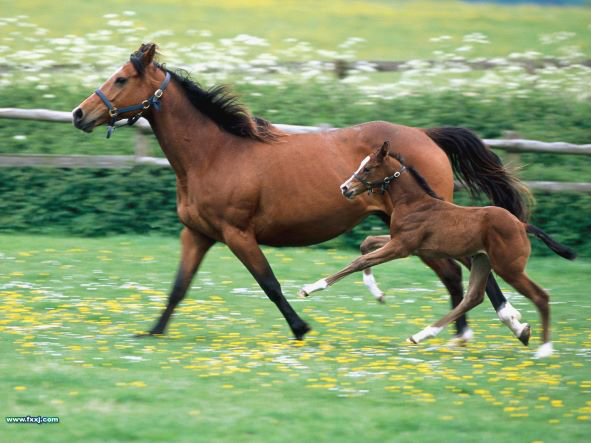

In [ ]:
#create the model 'netG' from the defined ResNetGenerator established above that has random weights
netG = ResNetGenerator()
#Get the file in which the weights fof the model have been stored
model_path = '/content/drive/MyDrive/Colab Files - Load/dlwpt-code-master/data/p1ch2/horse2zebra_0.4.0.pth'
#Load the contents of the file with the model weights 
model_data = torch.load(model_path)
#Load the weight data into the netG model
netG.load_state_dict(model_data)
#Put the netG model into eval mode so we can use it for inference
netG.eval()
#import the torchvision transforms function
from torchvision import transforms
#Transform the input image by scaling to usable size then transform the image into a tensor
preprocess = transforms.Compose([transforms.Resize(256),
                                 transforms.ToTensor()])
#Import the given image from my google drive via the path provided
from PIL import Image
img = Image.open("/content/drive/MyDrive/Colab Files - Load/Homework 0 P2/horse4.jpg")
#Print the image
img

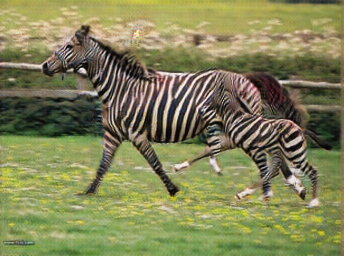

In [ ]:
#Send the image through the preprocess pipeline
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)
#Send the Batch through the model
batch_out = netG(batch_t)
#Convert the out tensor back into an image and save it to the given location in my google drive
#@title
out_t = (batch_out.data.squeeze() + 1.0) / 2.0
out_img = transforms.ToPILImage()(out_t)
out_img.save('/content/drive/MyDrive/Colab Files - Load/Homework 0 P2/zebra4.jpg')
#show me the image
out_img

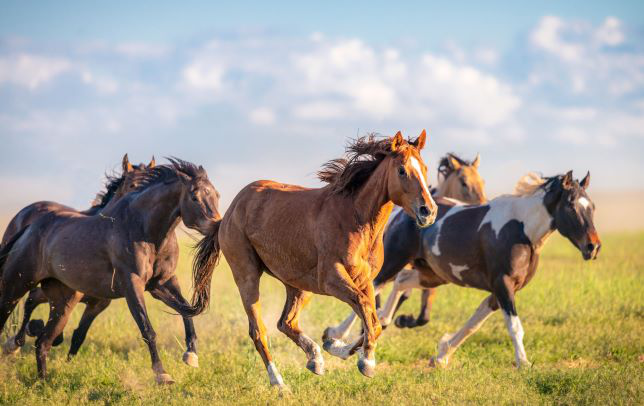

In [ ]:
#create the model 'netG' from the defined ResNetGenerator established above that has random weights
netG = ResNetGenerator()
#Get the file in which the weights fof the model have been stored
model_path = '/content/drive/MyDrive/Colab Files - Load/dlwpt-code-master/data/p1ch2/horse2zebra_0.4.0.pth'
#Load the contents of the file with the model weights 
model_data = torch.load(model_path)
#Load the weight data into the netG model
netG.load_state_dict(model_data)
#Put the netG model into eval mode so we can use it for inference
netG.eval()
#import the torchvision transforms function
from torchvision import transforms
#Transform the input image by scaling to usable size then transform the image into a tensor
preprocess = transforms.Compose([transforms.Resize(256),
                                 transforms.ToTensor()])
#Import the given image from my google drive via the path provided
from PIL import Image
img = Image.open("/content/drive/MyDrive/Colab Files - Load/Homework 0 P2/horse5.jpg")
#Print the image
img

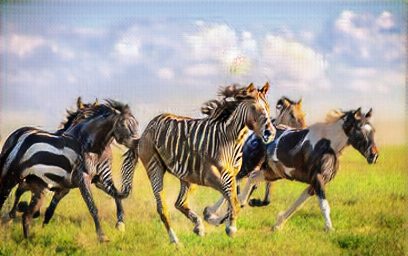

In [ ]:
#Send the image through the preprocess pipeline
img_t = preprocess(img)
batch_t = torch.unsqueeze(img_t, 0)
#Send the Batch through the model
batch_out = netG(batch_t)
#Convert the out tensor back into an image and save it to the given location in my google drive
#@title
out_t = (batch_out.data.squeeze() + 1.0) / 2.0
out_img = transforms.ToPILImage()(out_t)
out_img.save('/content/drive/MyDrive/Colab Files - Load/Homework 0 P2/zebra5.jpg')
#show me the image
out_img